## Part 1 - Linear Regression

### Problem 1 - Linear Regression with Direct Minimization

In [8]:
print('PROBLEM 1')
print('----------')

PROBLEM 1
----------


In [9]:
def learnOLERegression(X,y):
    # Inputs:                                                         
    # X = N x d 
    # y = N x 1                                                               
    # Output: 
    # w = d x 1 

    # IMPLEMENT THIS METHOD - REMOVE THE NEXT LINE
    w = np.zeros((X.shape[0],1))

    product_XTX = np.dot(np.transpose(X), X)
    inverse_product_XTX = np.linalg.inv(product_XTX)
    product_XTy = np.dot(np.transpose(X), y)
    w = np.dot(inverse_product_XTX, product_XTy)
    return w

In [10]:
def testOLERegression(w,Xtest,ytest):
    # Inputs:
    # w = d x 1
    # Xtest = N x d
    # ytest = N x 1
    # Output:
    # rmse = scalar value

    # IMPLEMENT THIS METHOD - REMOVE THE NEXT LINE
    N = Xtest.shape[0]
    product_weight_Xtest = np.dot(Xtest,w)
    temp = np.square(np.subtract(ytest, product_weight_Xtest))
    rmse = np.sqrt(np.sum(temp)/N)
    return rmse

In [11]:
Xtrain,ytrain,Xtest,ytest = pickle.load(open('diabetes.pickle','rb'),encoding='latin1')   
# add intercept
x1 = np.ones((len(Xtrain),1))
x2 = np.ones((len(Xtest),1))

Xtrain_i = np.concatenate((np.ones((Xtrain.shape[0],1)), Xtrain), axis=1)
Xtest_i = np.concatenate((np.ones((Xtest.shape[0],1)), Xtest), axis=1)

w = learnOLERegression(Xtrain,ytrain)
w_i = learnOLERegression(Xtrain_i,ytrain)
rmse = testOLERegression(w,Xtrain,ytrain)
rmse_i = testOLERegression(w_i,Xtrain_i,ytrain)
print('RMSE without intercept on train data - %.2f'%rmse)
print('RMSE with intercept on train data - %.2f'%rmse_i)

rmse = testOLERegression(w,Xtest,ytest)
rmse_i = testOLERegression(w_i,Xtest_i,ytest)
print('RMSE without intercept on test data - %.2f'%rmse)
print('RMSE with intercept on test data - %.2f'%rmse_i)


RMSE without intercept on train data - 138.20
RMSE with intercept on train data - 46.77
RMSE without intercept on test data - 326.76
RMSE with intercept on test data - 60.89


### Problem 2 - Linear Regression with Gradient Descent

In [12]:
print('PROBLEM 2')
print('----------')

PROBLEM 2
----------


In [13]:
def regressionObjVal(w, X, y):

    # compute squared error (scalar) with respect
    # to w (vector) for the given data X and y      
    #
    # Inputs:
    # w = d x 1
    # X = N x d
    # y = N x 1
    # Output:
    
    w = w.reshape((X.shape[1],1))
    y_subtract_X_mul_w = np.subtract(y,np.dot(X,w))   
    error = ((1/2)*np.sum(np.dot(y_subtract_X_mul_w.T,y_subtract_X_mul_w)))
    return error


In [14]:
def regressionGradient(w, X, y):

    # compute gradient of squared error (scalar) with respect
    # to w (vector) for the given data X and y   
    
    # Inputs:
    # w = d x 1
    # X = N x d
    # y = N x 1
    # Output:
    # gradient = d length vector (not a d x 1 matrix)
    # formula = transpose(X)*X*w - transpose(X)*y
    w=w.reshape((X.shape[1],1))
    error_grad = np.subtract(np.dot(np.dot(X.T,X),w),np.dot(X.T, y))
    error_grad=error_grad.reshape((X.shape[1],))
    return error_grad

In [15]:
Xtrain,ytrain,Xtest,ytest = pickle.load(open('diabetes.pickle','rb'),encoding='latin1')   
# add intercept
Xtrain_i = np.concatenate((np.ones((Xtrain.shape[0],1)), Xtrain), axis=1)
Xtest_i = np.concatenate((np.ones((Xtest.shape[0],1)), Xtest), axis=1)
args = (Xtrain_i,ytrain)
opts = {'maxiter' : 50}    # Preferred value. 
w_init = np.zeros((Xtrain_i.shape[1],1))
soln = minimize(regressionObjVal, w_init, jac=regressionGradient, args=args,method='CG', options=opts)
w = np.transpose(np.array(soln.x))
w = w[:,np.newaxis]
rmse = testOLERegression(w,Xtrain_i,ytrain)
print('Gradient Descent Linear Regression RMSE on train data - %.2f'%rmse)
rmse = testOLERegression(w,Xtest_i,ytest)
print('Gradient Descent Linear Regression RMSE on test data - %.2f'%rmse) #98, 60

Gradient Descent Linear Regression RMSE on train data - 47.88
Gradient Descent Linear Regression RMSE on test data - 55.89


## Part 2 - Linear Classification

### Problem 3 - Perceptron using Gradient Descent

In [16]:
print('PROBLEM 3')
print('----------')

PROBLEM 3
----------


In [17]:
def predictLinearModel(w,Xtest):
    # Inputs:
    # w = d x 1
    # Xtest = N x d
    # Output:
    # ypred = N x 1 vector of predictions

    # IMPLEMENT THIS METHOD - REMOVE THE NEXT LINE
    ypred = np.array(list(map(lambda x:-1 if x<0 else 1,np.dot(Xtest,w)))).reshape([Xtest.shape[0],1])
    return ypred

In [18]:
def evaluateLinearModel(w,Xtest,ytest):
    # Inputs:
    # w = d x 1
    # Xtest = N x d
    # ytest = N x 1
    # Output:
    # acc = scalar values
    
    # IMPLEMENT THIS METHOD - REMOVE THE NEXT LINE
    ypred = predictLinearModel(w,Xtest)
    acc = np.mean(ypred == ytest) 
    return acc

In [19]:
Xtrain,ytrain, Xtest, ytest = pickle.load(open('sample.pickle','rb')) 
# add intercept
Xtrain_i = np.concatenate((np.ones((Xtrain.shape[0],1)), Xtrain), axis=1)
Xtest_i = np.concatenate((np.ones((Xtest.shape[0],1)), Xtest), axis=1)

args = (Xtrain_i,ytrain)
opts = {'maxiter' : 50}    # Preferred value.    
w_init = np.zeros((Xtrain_i.shape[1],1))
soln = minimize(regressionObjVal, w_init, jac=regressionGradient, args=args,method='CG', options=opts)
w = np.transpose(np.array(soln.x))
w = w[:,np.newaxis]
acc = evaluateLinearModel(w,Xtrain_i,ytrain)
print('Perceptron Accuracy on train data - %.2f'%acc)
acc = evaluateLinearModel(w,Xtest_i,ytest)
print('Perceptron Accuracy on test data - %.2f'%acc) #54 45

Perceptron Accuracy on train data - 0.84
Perceptron Accuracy on test data - 0.84


### Problem 4 - Logistic Regression Using Newton's Method

In [20]:
print('PROBLEM 4')
print('----------')

PROBLEM 4
----------


In [21]:
def logisticObjVal(w, X, y):

    # compute log-loss error (scalar) with respect
    # to w (vector) for the given data X and y                               
    # Inputs:
    # w = d x 1
    # X = N x d
    # y = N x 1
    # Output:
    # error = scalar
    w = w.reshape(X.shape[1],1)
    error = np.mean(np.log(1+np.exp(-1*y*np.matmul(X,w))))
    return error


In [22]:
def logisticGradient(w, X, y):

    # compute the gradient of the log-loss error (vector) with respect
    # to w (vector) for the given data X and y  
    #
    # Inputs:
    # w = d x 1
    # X = N x d
    # y = N x 1
    # Output:
    # error = d length gradient vector (not a d x 1 matrix)
    w = w.reshape(w.shape[0],1)
    gradient = -1*np.divide(np.matmul(X.T,np.divide(y,1+np.exp(y*np.matmul(X,w)))),X.shape[0])
    gradient = gradient.reshape(gradient.shape[0],)
    return gradient

In [23]:
def logisticHessian(w, X, y):

    # compute the Hessian of the log-loss error (matrix) with respect
    # to w (vector) for the given data X and y                               
    #
    # Inputs:t
    # w = d x 1
    # X = N x d
    # y = N x 1
    # Output:
    # Hessian = d x d matrix
    w = w.reshape(X.shape[1],1)
    exp = np.exp(y*np.matmul(X,w))
    # IMPLEMENT THIS METHOD - REMOVE THE NEXT LINE
    hessian = np.divide(np.matmul(X.T,(np.divide(exp,np.square((1+exp)))*X)),X.shape[0])
    return hessian

In [24]:
Xtrain,ytrain, Xtest, ytest = pickle.load(open('sample.pickle','rb')) 
# add intercept
Xtrain_i = np.concatenate((np.ones((Xtrain.shape[0],1)), Xtrain), axis=1)
Xtest_i = np.concatenate((np.ones((Xtest.shape[0],1)), Xtest), axis=1)

args = (Xtrain_i,ytrain)
opts = {'maxiter' : 50}    # Preferred value.    
w_init = np.zeros((Xtrain_i.shape[1],1))
soln = minimize(logisticObjVal, w_init, jac=logisticGradient, hess=logisticHessian, args=args,method='Newton-CG', options=opts)
w = np.transpose(np.array(soln.x))
w = np.reshape(w,[len(w),1])
acc = evaluateLinearModel(w,Xtrain_i,ytrain)
print('Logistic Regression Accuracy on train data - %.2f'%acc)
acc = evaluateLinearModel(w,Xtest_i,ytest)
print('Logistic Regression Accuracy on test data - %.2f'%acc) #85, 86

Logistic Regression Accuracy on train data - 0.84
Logistic Regression Accuracy on test data - 0.86


### Problem 5 - Support Vector Machines Using Gradient Descent

In [25]:
print('PROBLEM 5')
print('----------')

PROBLEM 5
----------


In [26]:
def trainSGDSVM(X,y,T,eta=0.01):
    # learn a linear SVM by implementing the SGD algorithm
    #
    # Inputs:
    # X = N x d
    # y = N x 1
    # T = number of iterations
    # eta = learning rate
    # Output:
    # weight vector, w = d x 1
    # IMPLEMENT THIS METHOD
    w = np.zeros([X.shape[1],])
    for j in range(T):
        i = random.randrange(0,X.shape[0])
        if (y[i]*np.dot(w.T,X[i]) < 1):
            w = w + (eta * (y[i]*X[i]))
    return w

In [27]:
Xtrain,ytrain, Xtest, ytest = pickle.load(open('sample.pickle','rb')) 
# add intercept
Xtrain_i = np.concatenate((np.ones((Xtrain.shape[0],1)), Xtrain), axis=1)
Xtest_i = np.concatenate((np.ones((Xtest.shape[0],1)), Xtest), axis=1)
args = (Xtrain_i,ytrain)
w = trainSGDSVM(Xtrain_i,ytrain,200,0.01)
acc = evaluateLinearModel(w,Xtrain_i,ytrain)
print('SVM Accuracy on train data - %.2f'%acc)
acc = evaluateLinearModel(w,Xtest_i,ytest)
print('SVM Accuracy on test data - %.2f'%acc)

SVM Accuracy on train data - 0.82
SVM Accuracy on test data - 0.81


### Problem 6 - Plotting decision boundaries

In [28]:
print('Problem 6')
print('---------')

Problem 6
---------


In [29]:
def plotBoundaries(w,X,y):
    # plotting boundaries

    mn = np.min(X,axis=0)
    mx = np.max(X,axis=0)
    x1 = np.linspace(mn[1],mx[1],100)
    x2 = np.linspace(mn[2],mx[2],100)
    xx1,xx2 = np.meshgrid(x1,x2)
    xx = np.zeros((x1.shape[0]*x2.shape[0],2))
    xx[:,0] = xx1.ravel()
    xx[:,1] = xx2.ravel()
    xx_i = np.concatenate((np.ones((xx.shape[0],1)), xx), axis=1)
    ypred = predictLinearModel(w,xx_i)
    ax.contourf(x1,x2,ypred.reshape((x1.shape[0],x2.shape[0])),alpha=0.3,cmap='cool')
    ax.scatter(X[:,1],X[:,2],c=y.flatten())

Text(0.5, 1.0, 'SVM')

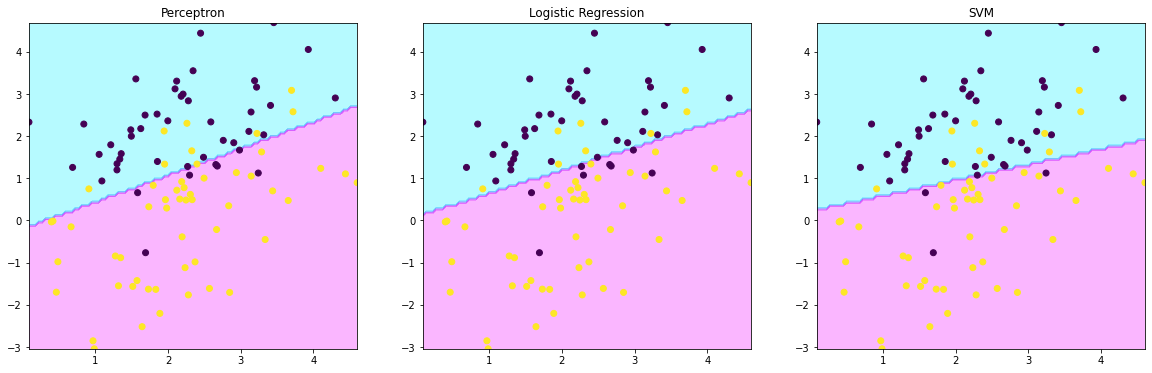

In [30]:
Xtrain,ytrain, Xtest, ytest = pickle.load(open('sample.pickle','rb')) 

Xtrain_i = np.concatenate((np.ones((Xtrain.shape[0],1)), Xtrain), axis=1)
Xtest_i = np.concatenate((np.ones((Xtest.shape[0],1)), Xtest), axis=1)


w_perceptron = np.transpose(np.array(minimize(regressionObjVal, w_init, jac=regressionGradient, args=args,method='CG', options=opts).x))
w_logistic = np.transpose(np.array(minimize(logisticObjVal, w_init, jac=logisticGradient, hess=logisticHessian, args=args,method='Newton-CG', options=opts).x))
w_svm = trainSGDSVM(Xtrain_i,ytrain,200,0.01)
fig = plt.figure(figsize=(20,6))
ax = plt.subplot(1,3,1)
plotBoundaries(w_perceptron,Xtrain_i,ytrain)
ax.set_title('Perceptron')

ax = plt.subplot(1,3,2)
plotBoundaries(w_logistic,Xtrain_i,ytrain)
ax.set_title('Logistic Regression')

ax = plt.subplot(1,3,3)
plotBoundaries(w_svm,Xtrain_i,ytrain)
ax.set_title('SVM')